# Insurance Premium Prediction

In [216]:
# Import Required Libararies
import time
import random
import warnings
warnings.filterwarnings("ignore")
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
import sklearn.metrics as skmet
from pprint import pprint
import joblib
import pickle
import os

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

# import the ML algorithm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import graphviz
from IPython.display import display


# pre-processing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# import libraries for model validation
from imblearn.over_sampling import SMOTENC,RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
import statistics

In [61]:
data = pd.read_csv('Insurance Premium Prediction.csv')

In [62]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [65]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [66]:
data.duplicated().sum()


1

In [67]:
df= data.drop_duplicates()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [69]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [70]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [71]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

### EDA

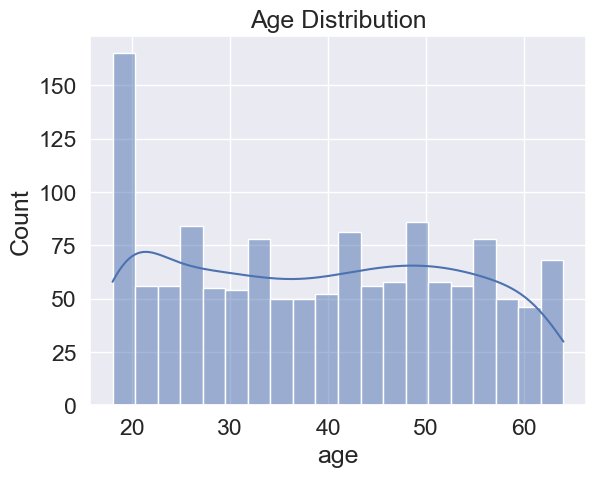

In [72]:
# Age distribution
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

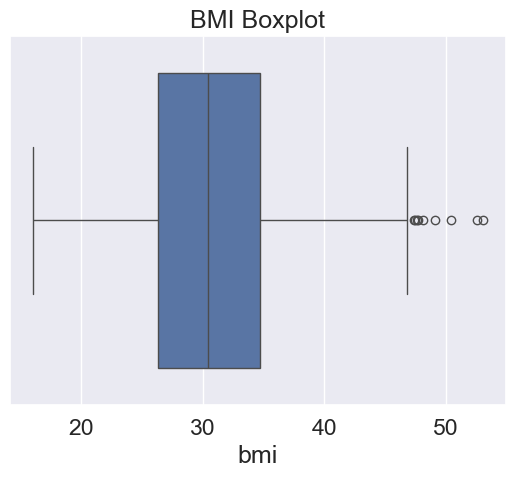

In [73]:
# BMI boxplot
sns.boxplot(x='bmi', data=df)
plt.title('BMI Boxplot')
plt.show()

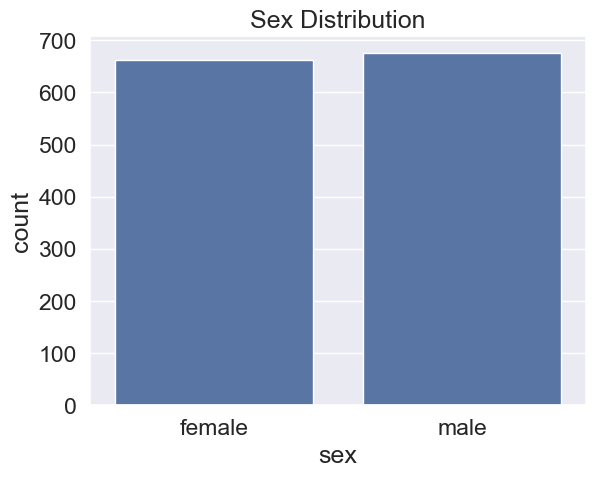

In [74]:
# Bar plot for categorical variables
# Sex 
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

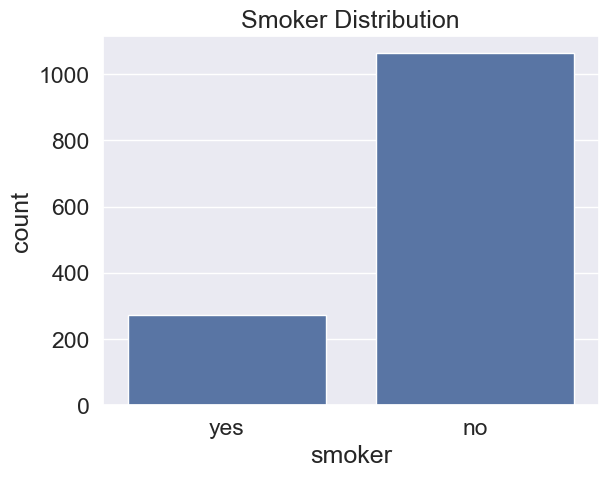

In [75]:
# Smoker
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')
plt.show()

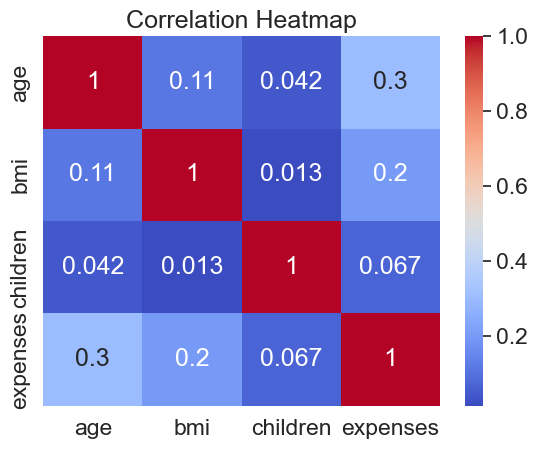

In [76]:
# Select only the numerical columns
numerical_df = df[['age', 'bmi', 'children', 'expenses']]  # Include only numerical columns

# Correlation heatmap
corr = numerical_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

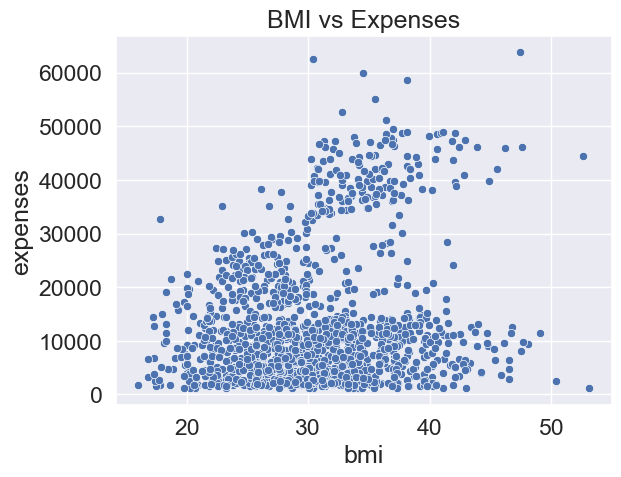

In [77]:
# Scatter plot for BMI vs Expenses
sns.scatterplot(x='bmi', y='expenses', data=df)
plt.title('BMI vs Expenses')
plt.show()

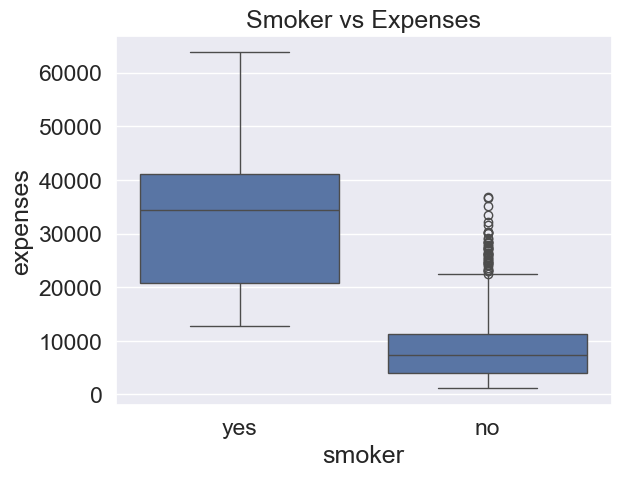

In [78]:
# Boxplot for smoker vs expenses
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title('Smoker vs Expenses')
plt.show()

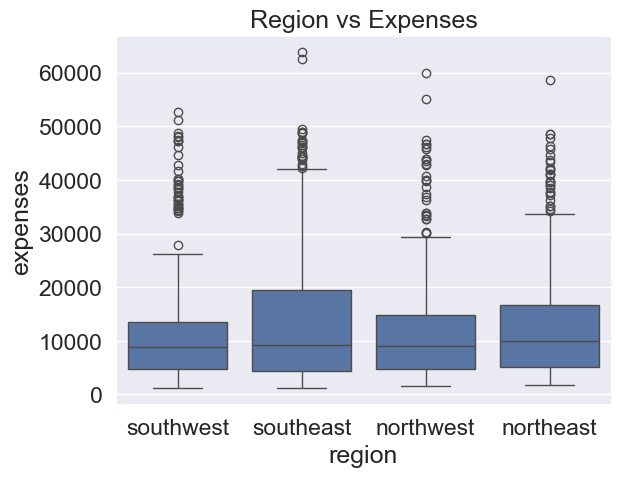

In [79]:
# Boxplot for region vs expenses
sns.boxplot(x='region', y='expenses', data=df)
plt.title('Region vs Expenses')
plt.show()

In [80]:
# Cross-tabulation for sex and smoker
pd.crosstab(df['sex'], df['smoker'], normalize='index')

smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764444,0.235556


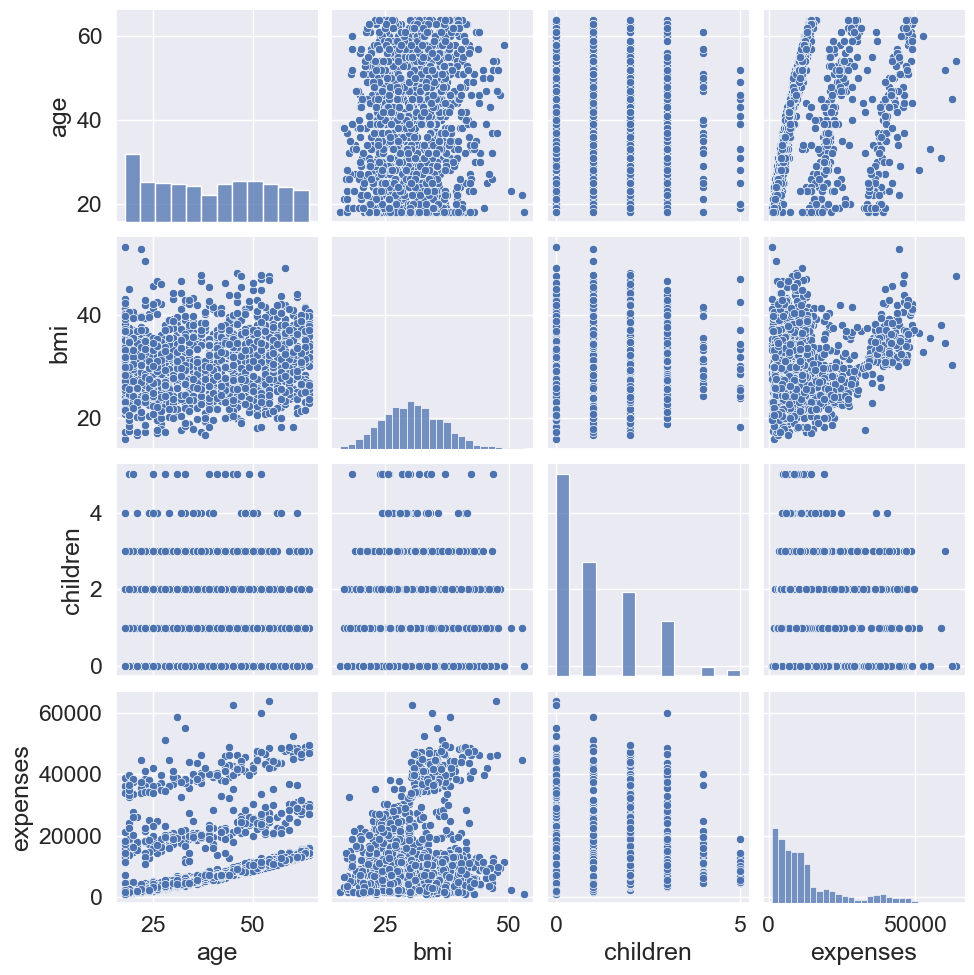

In [81]:
# Pairplot for numerical variables
sns.pairplot(df[['age', 'bmi', 'children', 'expenses']])
plt.show()

### Outliers

age            Axes(0.125,0.11;0.168478x0.77)
bmi         Axes(0.327174,0.11;0.168478x0.77)
children    Axes(0.529348,0.11;0.168478x0.77)
expenses    Axes(0.731522,0.11;0.168478x0.77)
dtype: object

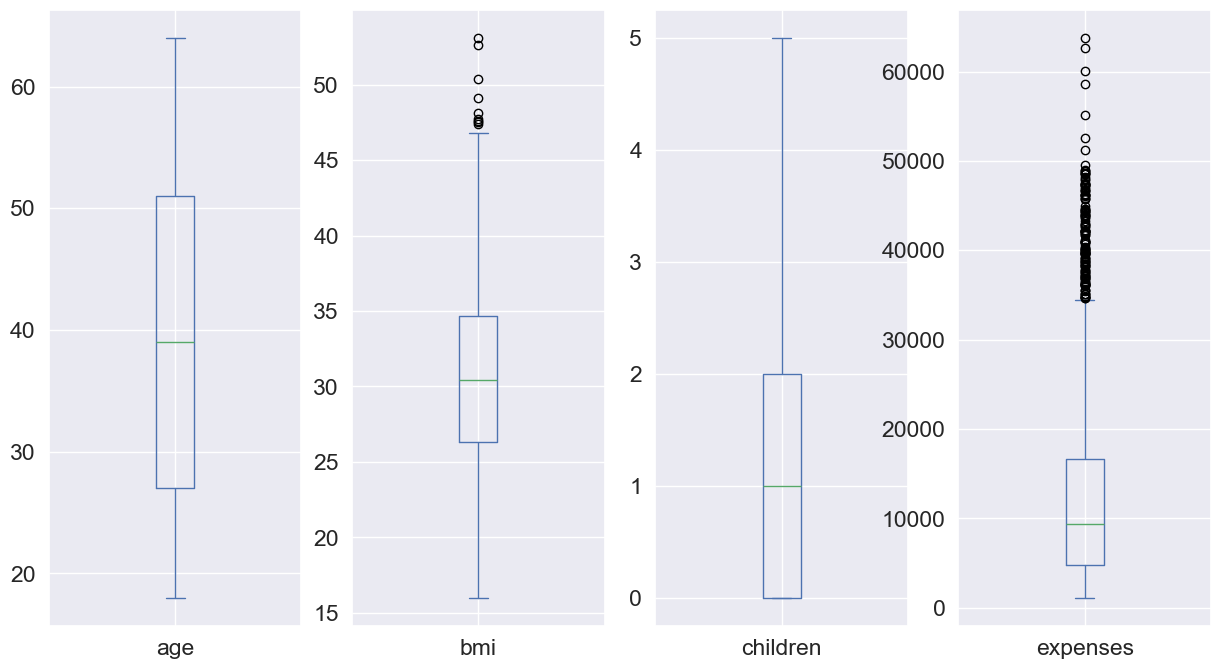

In [82]:
# Boxplot for Check Ouliers
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (15, 8))

In [83]:
# Winsorizer for removing Outliers
from feature_engine.outliers import Winsorizer

In [84]:
winsor = Winsorizer(capping_method = 'iqr',
                    tail = 'both',
                    fold = 1.5,
                    variables = ['bmi'])

winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both', variables=['bmi'])

In [85]:
outliers = winsor.fit(df[['bmi']])

In [86]:
df[['bmi']] = outliers.transform(df[['bmi']])

age            Axes(0.125,0.11;0.168478x0.77)
bmi         Axes(0.327174,0.11;0.168478x0.77)
children    Axes(0.529348,0.11;0.168478x0.77)
expenses    Axes(0.731522,0.11;0.168478x0.77)
dtype: object

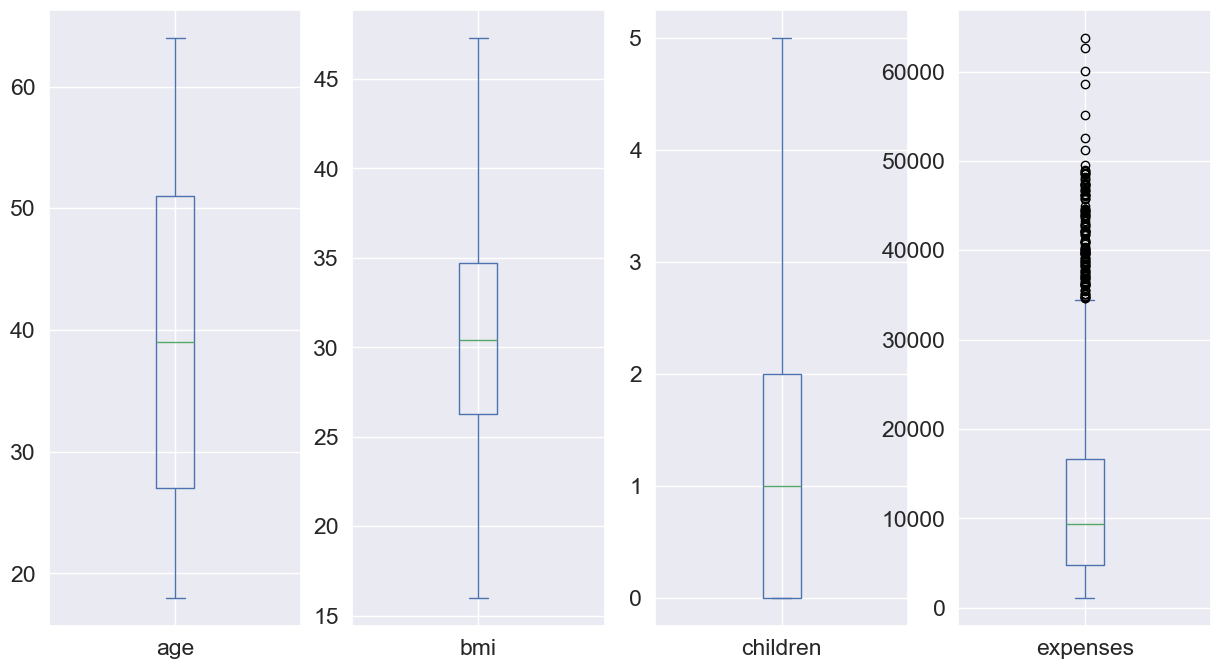

In [87]:
# Check Outliers Afer Winsorization
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (15, 8))

### Data Preprocessing

In [88]:
# change Sex Column value F as 0 and M as 1
df['sex'] = df['sex'].replace({'female': 0, 'male': 1})

In [89]:
# change smoker Column value 'no' as 0 and 'yes' as 1
df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})

In [93]:
df.drop('region', axis=1, inplace=True)

In [94]:
df.head()

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86


### Correlation

In [95]:
df.corr()

,age,sex,bmi,children,smoker,expenses
age,1.000000,-0.019814,0.112074,0.041536,-0.025587,0.298308
sex,-0.019814,1.000000,0.044840,0.017848,0.076596,0.058045
bmi,0.112074,0.044840,1.000000,0.013578,0.003364,0.199296
children,0.041536,0.017848,0.013578,1.000000,0.007331,0.067389
smoker,-0.025587,0.076596,0.003364,0.007331,1.000000,0.787234
expenses,0.298308,0.058045,0.199296,0.067389,0.787234,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

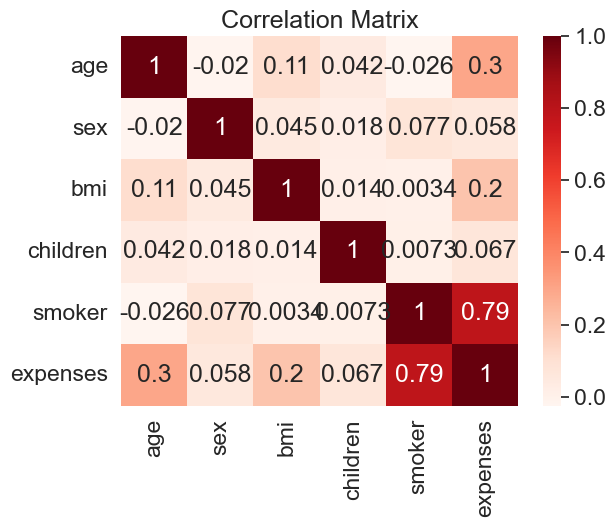

In [100]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [101]:
df.expenses.corr(df.age)

0.2983082112316942

In [102]:
df.expenses.corr(df.bmi)

0.1992958345946449

In [104]:
df.expenses.corr(df.smoker)

0.7872343667298228

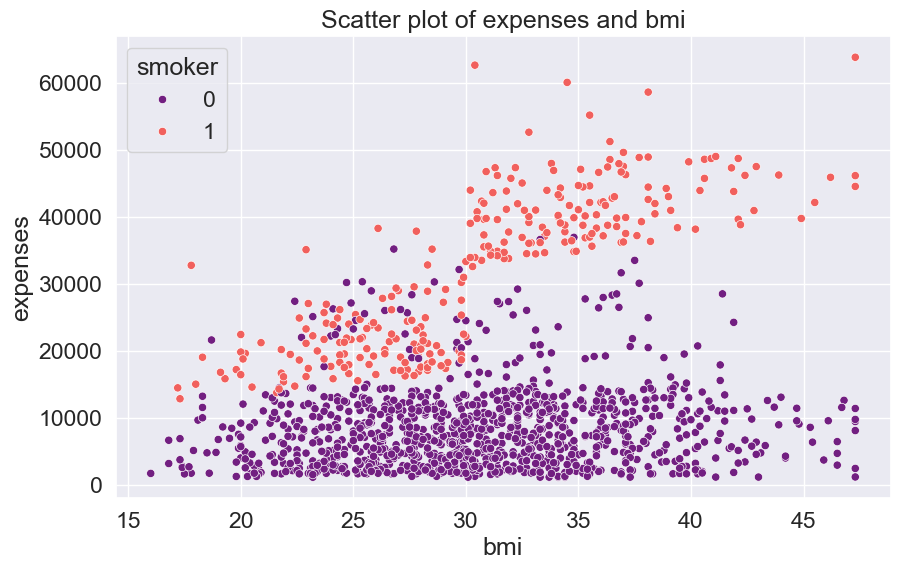

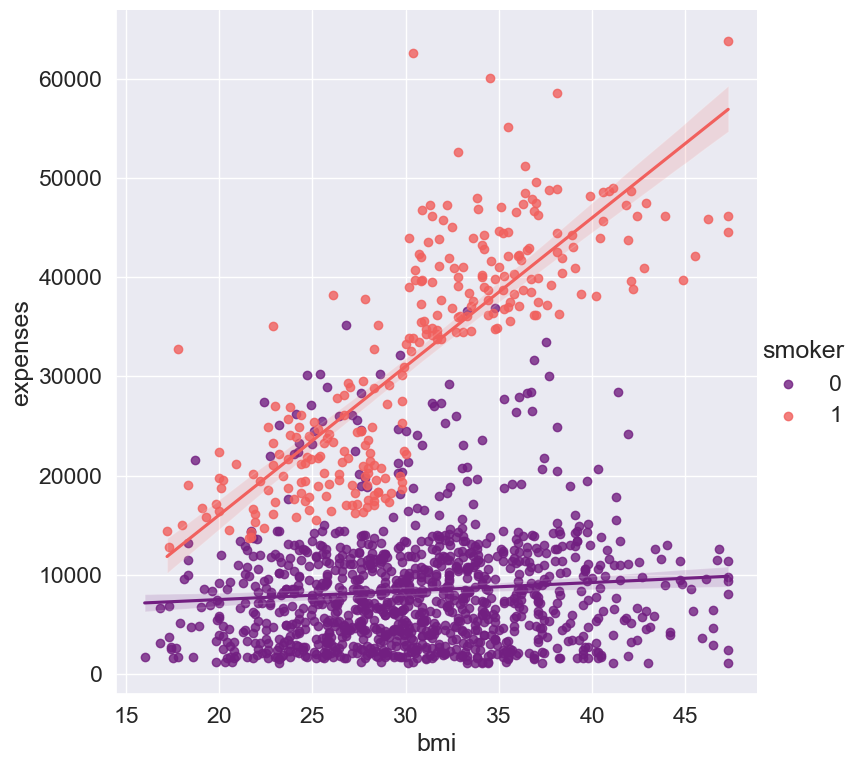

In [106]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='expenses',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of expenses and bmi')

sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df, palette='magma', height=8)

### Machine Learning Model Building

In [107]:
x = df.drop(labels = 'expenses', axis = 1)
y = df[['expenses']]

In [108]:
# split the train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [109]:
#check shape
x_train.shape

(1069, 5)

In [110]:
x_test.shape

(268, 5)

In [111]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [112]:
# Fit StandardScaler 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Linear Regression Model

In [249]:
# Linear Regression Model
LRM = LinearRegression()

In [250]:
# Fit Model
LRM.fit(x_train, y_train)

LinearRegression()

In [252]:
# Prediction
y_pred = LRM.predict(x_test)

In [253]:
# Evaluate the model
linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

In [254]:
# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print(('The r2_score using Linear Regression :{}'.format(linear_reg_r2_score)))

The Mean Squared Error using Linear Regression :34048960.98281812
The Root Mean Squared Error using Linear Regression :5835.14875412942
The r2_score using Linear Regression :0.7640911281487297


In [255]:
score = []
for i in range(1000):
    x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=i)
    clf = LRM
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score.append(r2_score(y_test, y_pred_lrm))

In [256]:
np.argmax(score)

999

In [257]:
score[np.argmax(score)]

0.7640911281487297

### Decision Tree Model

In [155]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Model
DT = DecisionTreeRegressor(max_depth=4, min_samples_split=4, random_state=42)

In [156]:
# Fir model in training data
DT.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=4, random_state=42)

In [157]:
# Predicting the model
y_pred1 = DT.predict(x_test)

In [158]:
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

In [159]:
print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The Root Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The r2_score using Decision Tree Regressor : {}".format(decision_tree_r2_score))

The Mean Squared Error using Decision Tree Regressor : 34048960.98281812
The Root Mean Squared Error using Decision Tree Regressor : 4747.618004578813
The r2_score using Decision Tree Regressor : 0.8438320367322802


### Random Forest Model

In [196]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, max_depth=4, min_samples_split=5, random_state=42)

In [197]:
# Fir model
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_split=5, random_state=42)

In [198]:
# Predicting the model
y_pred2 = rf.predict(x_test)

In [199]:
# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

In [200]:
print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(random_forest_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 21263262.874664668
The Root Mean Squared Error using Random Forest Regressor : 4611.210564988837
The r2_score Error using Random Forest Regressor : 0.8526770799505328


### Gradient Boosting Model

In [203]:
# Model
gb = GradientBoostingRegressor()

In [205]:
# Fit Model
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [206]:
# Predicting the model
y_pred3 = gb.predict(x_test)

In [207]:
# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

In [208]:
print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gradient_boosting_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 20819062.697783753
The Root Mean Squared Error using Gradient Boosting Regressor : 4562.791108278326
The r2_sccore using Gradient Boosting Regressor : 0.8557547292995684


#### Using Parameter in Gradient Boost Model

In [209]:
gbr = GradientBoostingRegressor(n_estimators=41, max_depth=3, min_samples_split=4, random_state=42)

In [210]:
# Fit Model
gbr.fit(x_train, y_train)

GradientBoostingRegressor(min_samples_split=4, n_estimators=41, random_state=42)

In [213]:
# Predicting the model
y_pred3 = gbr.predict(x_test)

In [214]:
# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

In [215]:
print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gradient_boosting_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 20363801.6289357
The Root Mean Squared Error using Gradient Boosting Regressor : 4512.626910008814
The r2_sccore using Gradient Boosting Regressor : 0.8589090142483499


### K-Nearest Neighbor(KNN) Model

In [237]:
knn = KNeighborsRegressor(n_neighbors=11)

In [238]:
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [239]:
# Predictiong The model
y_pred4 = knn.predict(x_test)

In [240]:
# Evaluation Metrics
knn_mse = mean_squared_error(y_test, y_pred4)
knn_rmse = mean_squared_error(y_test, y_pred4, squared=False)
knn_r2_score = r2_score(y_test, y_pred4)

In [241]:
print("The mean squared error using KNN is {}".format(knn_mse))
print("The root mean squared error using KNN is {}".format(knn_rmse))
print("The r2_score using KNN is {}".format(knn_r2_score))

The mean squared error using KNN is 126370685.6387907
The root mean squared error using KNN is 11241.47168473909
The r2_score using KNN is 0.12443830814213563


### XGBoost Model

In [242]:
xgb = xgb.XGBRegressor()

In [243]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [245]:
# Predicting the moodel
y_pred5 = xgb.predict(x_test)

In [246]:
# Evaluation Metrics
xgb_reg_mse = mean_squared_error(y_test, y_pred5)
xgb_reg_rmse = mean_squared_error(y_test, y_pred5, squared=False)
xgb_reg_r2_score = r2_score(y_test, y_pred5)

In [247]:
print("The mean square error using XGBoost is {}".format(xgb_reg_mse))
print("The root mean_squared error using XGBoost is {}".format(xgb_reg_rmse))
print("The r2 score using XGBoost is {}".format(xgb_reg_r2_score))

The mean square error using XGBoost is 27183234.22667625
The root mean_squared error using XGBoost is 5213.754331254614
The r2 score using XGBoost is 0.8116604461757273


In [258]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'Gradient Boosting', 'KNN', 'XGBoost'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, random_forest_rmse,
            gradient_boosting_rmse, knn_rmse, xgb_reg_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, 
    gradient_boosting_r2_score, knn_r2_score, xgb_reg_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
3,Gradient Boosting,4512.626910,0.858909
2,Random Forest,4611.210565,0.852677
1,Decision Tree,4747.618005,0.843832
5,XGBoost,5213.754331,0.811660
0,Linear Regression,5835.148754,0.764091
4,KNN,11241.471685,0.124438


In [261]:
pickle.dump(gb, open('gradient_boosting_regressor_model.pkl', 'wb'))